In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from scipy.optimize import minimize_scalar

import nengo
import nengo_brainstorm as brd
from nengolib.signal import nrmse
from pystorm.hal import HAL
from pystorm.PyDriver import bddriver

In [3]:
def setdac(pin, value, hal=HAL(), n_tries=10):
    for _ in range(n_tries):
        hal.driver.SetDACCount(0, pin, value)

HAL: clearing hardware state


In [4]:
dt = 0.001
length = 1000
freq = 10
radius = 1
seed = 0
n_neurons = 64
syn_probe = nengo.Lowpass(0.01)
solver = nengo.solvers.LstsqL2(reg=1e-3)
function = lambda x: x

In [5]:
u_array = nengo.processes.WhiteSignal(
    period=length*dt, high=freq, y0=0, seed=seed).run_steps(length, dt=dt)
u_array *= radius / np.max(np.abs(u_array))

In [6]:
with nengo.Network() as model:
    #add_params(model)
    #model.config[model].dac_syn_lk = dac_syn_lk

    u = nengo.Node(output=nengo.processes.PresentInput(u_array, dt))
    x = nengo.Ensemble(n_neurons=n_neurons, dimensions=1)

    nengo.Connection(u, x, synapse=None)  # synapse determined by brd

    p_spikes = nengo.Probe(x.neurons, 'spikes', synapse=None)

In [7]:
dac_syn_lks = list(range(0, 1024, 25)) # [0, 511, 1023]
s = np.empty((len(dac_syn_lks), length, n_neurons))
warnings = np.empty(len(dac_syn_lks), dtype=bool)

# resets DAC to some baseline for optimizing twiddle bits
setdac(pin=bddriver.bdpars.BDHornEP.DAC_SYN_LK, value=0)
for i, dac_syn_lk in enumerate(dac_syn_lks):
    with brd.Simulator(model, dt=dt, precompute_inputs=True) as sim:
        setdac(pin=bddriver.bdpars.BDHornEP.DAC_SYN_LK, value=dac_syn_lk)
        sim.run(length*dt)
        print("[dac_syn_lk=%s, warned=%s]" % (dac_syn_lk, sim.warned))
        warnings[i] = sim.warned
        s[i, :, :] = np.asarray(sim.data[p_spikes])

HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=0, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=25, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=50, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=75, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=100, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=125, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=150, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=175, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=200, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=225, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=250, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=275, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=300, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=325, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=350, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=375, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=400, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=425, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=450, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=475, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=500, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=525, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=550, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=575, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=600, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=625, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=650, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=675, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=700, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=725, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=750, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=775, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=800, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=825, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=850, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=875, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=900, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=925, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=950, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=975, warned=False]
disabling traffic
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs
HAL: doing logical mapping
mapping results written to mapped_core.txt
HAL: programming mapping results to hardware
HAL: clearing hardware state
HAL: clearing queued-up outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

discarded 0 spikes and 0 outputs


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[dac_syn_lk=1000, warned=False]
disabling traffic


In [8]:
#s = np.asarray(sim.data[p_spikes])
#print(s.shape)
#plt.figure()
#plt.plot(sim.trange(), s)
#plt.show()

#s = s.reshape((length, len(dac_syn_lks), n_neurons), order='F')
#s = s.transpose((1, 0, 2))

tau_bounds = (0, 0.1)
tau_trials = 100

In [9]:
from traceback import print_exc

taus = np.linspace(*tau_bounds, tau_trials)
r = np.ones((len(dac_syn_lks), tau_trials))

for i in range(len(dac_syn_lks)):
    #plt.figure()
    #plt.plot(s[i])
    #plt.show()

    a = syn_probe.filt(s[i], y0=0, dt=dt)

    try:
        for j, tau in enumerate(taus):
            y_ideal = syn_probe.filt(function(
                nengo.Lowpass(tau).filt(u_array, y0=0, dt=dt)), y0=0, dt=dt)
            d, _ = solver(a, y_ideal)
            y_hat = a.dot(d)
            r[i, j] = nrmse(y_hat, target=y_ideal)

    except:
        print("Exception on dac_syn_lk=%s" % dac_syn_lk)
        print_exc()

        #plt.figure()
        #plt.title(r"$\tau = %f \mapsto NRMSE = %f$" % (tau, r[i, j]))
        #plt.plot(u_array, label=r"$u$")
        #plt.plot(y_ideal, label=r"$y$")
        #plt.plot(y_hat, label=r"$\hat{y}$")
        #plt.legend()
        #plt.xlabel("Time (s)")
        #plt.show()

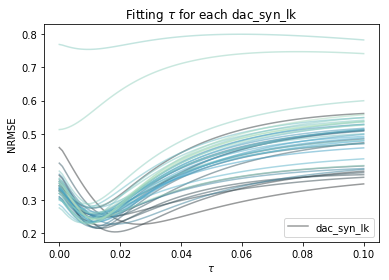

In [10]:
colours = sns.color_palette('GnBu_d', len(r))

plt.figure()
plt.title(r"Fitting $\tau$ for each dac_syn_lk")
for i, (c, r_i) in enumerate(zip(colours, r)):
    plt.plot(taus, r_i, c=c, alpha=0.5,
             label=None if i else "dac_syn_lk")
plt.xlabel(r"$\tau$")
plt.ylabel("NRMSE")
plt.legend()
plt.show()

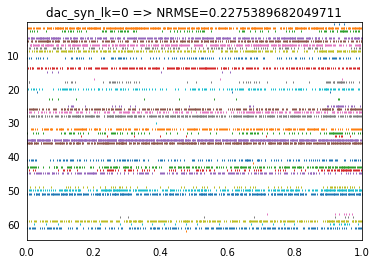

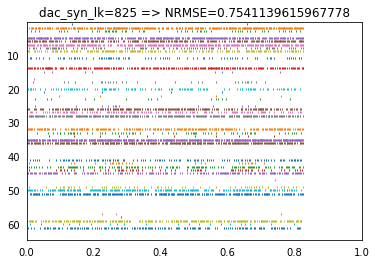

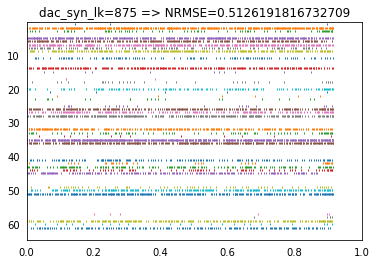

In [11]:
from nengo.utils.matplotlib import rasterplot

for i, r_i in enumerate(r):
    if r_i[0] > 0.45:
        plt.figure()
        plt.title("dac_syn_lk=%s => NRMSE=%s" % (dac_syn_lks[i], np.min(r_i)))
        rasterplot(sim.trange(), s[i])
        plt.show()